In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

%cd drive/MyDrive/Colab\ Notebooks/data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/content/drive/MyDrive/Colab Notebooks/data


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df_new = pd.read_csv('adverse_summary_mod.csv')
df_new.head(3)

,Unnamed: 0,ItemID,Text,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity
0,0,8597014,Trial of labor after cesarean delivery (tolac)...,NaN,NaN,"results, title, discussion, materials_and_meth...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4649030,Visual symptoms are well recognized as a side ...,NaN,NaN,NaN,NaN,NaN,introduction,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5174074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_new.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
def sentiment(text):
  if pd.isna(text):
    return "no_text"
  
  # Vader uses a dictionary based approach where each word is assigned a sentiment score (between -4 to +4)
  new_words = {
    'chemically induced': -4.0,
    'adverse effect': -4.0,
    'complication': -4.0,
    'poisoning': -4.0,
    'drug effect': -4.0,
    'side effect': -4.0,
    'adverse reaction': -4.0,
    'pharmacological action': -4.0,
    'adverse drug event': -4.0,
    'adverse event': -4.0,
    'adverse': -4.0,
    'complexity': -4.0,
    'symptoms': -4.0
  }

  SIA = SentimentIntensityAnalyzer()
  SIA.lexicon.update(new_words)

  # SIA.lexicon.pop('no')

  score = SIA.polarity_scores(text)
  if score['neg'] > score['pos']:
      return "adverse_effect"
  elif score['neg'] < score['pos']:
      return "no_adverse_effect"
  
  return "neutral"

In [5]:
sentiment_score = df_new['Text'].apply(sentiment)
sentiment_score

0       no_adverse_effect
1          adverse_effect
2                 no_text
3          adverse_effect
4                 no_text
              ...        
6820       adverse_effect
6821              no_text
6822       adverse_effect
6823       adverse_effect
6824              no_text
Name: Text, Length: 6825, dtype: object

(array([ 456.,    0.,    0., 4412.,    0.,    0., 1806.,    0.,    0.,
         151.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

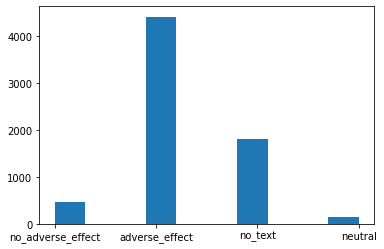

In [6]:
plt.hist(sentiment_score)

(array([ 964.,    0.,    0., 1806.,    0.,    0., 3899.,    0.,    0.,
         156.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

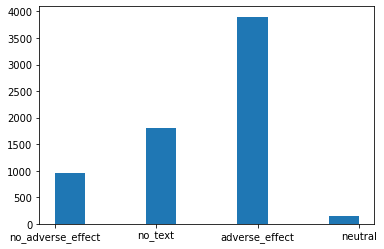

In [ ]:
# plt.hist(sentiment_score)

In [7]:
df_new['vd_sentiment'] = sentiment_score
noadv = df_new[df_new['vd_sentiment'] == 'no_adverse_effect']
noadv.head(3)

,ItemID,Text,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,vd_sentiment
0,8597014,Trial of labor after cesarean delivery (tolac)...,NaN,NaN,"results, title, discussion, materials_and_meth...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_adverse_effect
11,8126837,"In this retrospective study, the effects of an...",NaN,introduction,"results, introduction, materials_and_methods, ...",NaN,NaN,"discussion, abstract",NaN,NaN,NaN,NaN,introduction,NaN,no_adverse_effect
52,7621371,[ 32 ] 2018 43 not given right hilar not repor...,NaN,NaN,introduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_adverse_effect


In [11]:
noadv.loc[11]['Text']

'In this retrospective study, the effects of anti-phospholipid syndrome and the use of common drugs such as methotrexate, cyclosporine, and azathioprine and their side effects on maternal health and ultimately the development of the fetus have been investigated.Material and this study is a descriptive and retrospective epidemiologic study that was conducted in 2016 to investigate maternal and fetal complications in sle patients.It also leads to complications such as nephritis, arthritis, and preeclampsia in the mother ( p value 0.The disease is more common in women and, moreover, the symptoms of the disease become more severe in women who are pregnant and have adverse effects on the health of the mother and the fetus, which sometimes even results in maternal and fetal mortality or impairment of fetal development [ 1 , 2 ].Hence, the results of the recent studies have shown that the progression of the disease and the exacerbation of its symptoms before or during pregnancy can lead to an

In [12]:
import nltk.sentiment.vader as Vd

def vd_sentiment(text):
  if pd.isna(text):
    return "no_text"
  
  # Vader uses a dictionary based approach where each word is assigned a sentiment score (between -4 to +4)
  new_words = {
    'chemically induced': -4.0,
    'adverse effect': -4.0,
    'complication': -4.0,
    'poisoning': -4.0,
    'drug effect': -4.0,
    'side effect': -4.0,
    'adverse reaction': -4.0,
    'pharmacological action': -4.0,
    'adverse drug event': -4.0,
    'adverse event': -4.0,
    'adverse': -4.0,
    'complexity': -4.0
  }

  new_idioms = {
    'chemically induced': -4.0,
    'adverse effect': -4.0,
    'complication': -4.0,
    'poisoning': -4.0,
    'drug effect': -4.0,
    'side effect': -4.0,
    'adverse reaction': -4.0,
    'pharmacological action': -4.0,
    'adverse drug event': -4.0,
    'adverse event': -4.0,
    'adverse': -4.0,
    'complexity': -4.0,
  }
  Vd.SPECIAL_CASE_IDIOMS.update(new_idioms)
  Vd.BOOSTER_DICT.update(new_idioms)

  SIA = Vd.SentimentIntensityAnalyzer()
  SIA.lexicon.update(new_words)

  # SIA.lexicon.pop('no')

  score = SIA.polarity_scores(text)
  if score['neg'] > score['pos']:
      return "adverse_effect"
  elif score['neg'] < score['pos']:
      return "no_adverse_effect"
  
  return "neutral"

In [ ]:
import inspect

lines = inspect.getsource(Vd)
print(lines)

# coding: utf-8
# Natural Language Toolkit: vader
#
# Copyright (C) 2001-2017 NLTK Project
# Author: C.J. Hutto <Clayton.Hutto@gtri.gatech.edu>
#         Ewan Klein <ewan@inf.ed.ac.uk> (modifications)
#         Pierpaolo Pantone <24alsecondo@gmail.com> (modifications)
#         George Berry <geb97@cornell.edu> (modifications)
# URL: <http://nltk.org/>
# For license information, see LICENSE.TXT
#
# Modifications to the original VADER code have been made in order to
# integrate it into NLTK. These have involved changes to
# ensure Python 3 compatibility, and refactoring to achieve greater modularity.

"""
If you use the VADER sentiment analysis tools, please cite:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
"""

import codecs
import math
import re
import string
from itertools import product
import nltk.data
from .ut

In [13]:
vd_sentiment_score = df_new['Text'].apply(vd_sentiment)
vd_sentiment_score

0          adverse_effect
1          adverse_effect
2                 no_text
3          adverse_effect
4                 no_text
              ...        
6820       adverse_effect
6821              no_text
6822    no_adverse_effect
6823    no_adverse_effect
6824              no_text
Name: Text, Length: 6825, dtype: object

(array([3074.,    0.,    0., 1806.,    0.,    0., 1475.,    0.,    0.,
         470.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

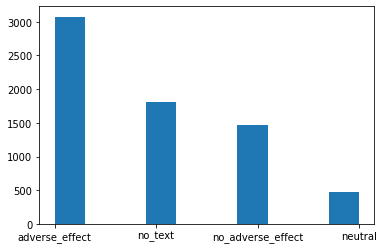

In [14]:
plt.hist(vd_sentiment_score)

(array([3053.,    0.,    0., 1806.,    0.,    0., 1497.,    0.,    0.,
         469.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

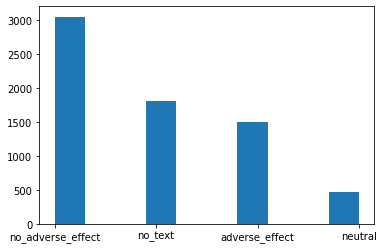

In [ ]:
# plt.hist(vd_sentiment_score)

In [ ]:
df_new['vd_sentiment'] = vd_sentiment_score

In [ ]:
noadv = df_new[df_new['vd_sentiment'] == 'no_adverse_effect']['Text']
noadv.head(3)

0    Trial of labor after cesarean delivery (tolac)...
1    Visual symptoms are well recognized as a side ...
3    There have also been numerous reports on the p...
Name: Text, dtype: object

In [ ]:
noadv.loc[1]

'Visual symptoms are well recognized as a side effect of sildenafil when used for erectile dysfunction [ 10 ].'

In [ ]:
from textblob import TextBlob

In [ ]:
def tb_sentiment(text):
  if pd.isna(text):
    return "no_text"

  score = TextBlob(text).sentiment.polarity

  if score > 0:
      return "adverse_effect"
  elif score < 0:
      return "no_adverse_effect"
  
  return "neutral"

In [ ]:
tb_sentiment_score = df_new['Text'].apply(tb_sentiment)
tb_sentiment_score

0          adverse_effect
1                 neutral
2                 no_text
3          adverse_effect
4                 no_text
              ...        
6820              neutral
6821              no_text
6822              neutral
6823    no_adverse_effect
6824              no_text
Name: Text, Length: 6825, dtype: object

(array([3461.,    0.,    0.,  357.,    0.,    0., 1806.,    0.,    0.,
        1201.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

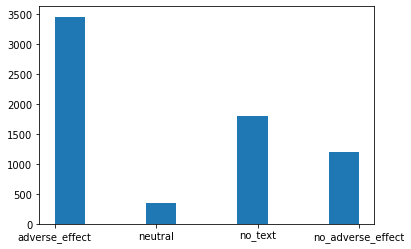

In [ ]:
plt.hist(tb_sentiment_score)

In [ ]:
TextBlob("Medicine XY0011 does not have adverse effect after 10 days.").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
TextBlob("This medicine has some adverse effect on patients after 10 days.", analyzer=NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.5962720980554924, p_neg=0.4037279019445061)

In [ ]:
def nb_sentiment(text):
  if pd.isna(text):
    return "no_text"
  
  try:
    score = TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
  except:
    score = {
        'p_neg': 0,
        'p_pos': 0
    }

  if score.p_neg < score.p_pos:
      return "adverse_effect"
  elif score.p_neg > score.p_pos:
      return "no_adverse_effect"
  
  return "neutral"

In [ ]:
nb_sentiment(df_new['Text'][0])

'adverse_effect'

In [ ]:
for text in df_new['Text']:
  print(nb_sentiment(text))

In [ ]:
nb_sentiment_score = df_new['Text'].apply(nb_sentiment)
nb_sentiment_score

In [ ]:
plt.hist(nb_sentiment_score)

In [ ]:
train = [
  ('chemically induced', 'pos'), 
  ('adverse effect', 'pos'), 
  ('complication', 'pos'), 
  ('poisoning', 'pos'), 
  ('drug effect', 'pos'), 
  ("side effect", 'pos'), 
  ("adverse reaction", "pos"),
  ("pharmacological action", "pos"),
  ("adverse drug event", "pos"),
  ("adverse event", "pos"),
  ("adverse", "pos"),
  ("complexity", "pos")
]

def cm_sentiment(text):

  score = TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment

  if score.p_neg > score.p_pos:
      return "adverse_effect"
  elif score.p_neg < score.p_pos:
      return "no_adverse_effect"
  
  return "neutral"

cl = NaiveBayesClassifier(train)
cl.classify("I feel amazing!")
'pos' 
blob = TextBlob("The beer is good. But the hangover is horrible.", classifier=cl) 
for s in blob.sentences: 
     print(s) 
     print(s.classify()) 